# OR 게이트 구현하기


*   [0,0], [0,1], [1,0], [1,1] feature에 따른 OR 연산 결과 예측
*   [0], [1], [1], [1] target (결과)



## 패키지 임포트

In [1]:
import tensorflow as tf
tf.random.set_seed(777) # random seed 고정 -> 실험을 재 구현 할 수 있도록

import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.losses import mse

## 데이터 준비하기

In [2]:
data = np.array([[0,0], [0,1], [1,0], [1,1]]) # 학습데이터
label = np.array([[0], [1], [1], [1]]) # 정답

In [3]:
data

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [4]:
label

array([[0],
       [1],
       [1],
       [1]])

## 모델 구성하기

In [5]:
model = Sequential()

# 단층 퍼셉트론
model.add(Dense(1, input_shape=(2, ), activation='linear')) # 활성화 함수 -> 선형 모델
# Dense(N) : 하나의 층 (perceptron)에 Dense를 N개
# input_shape=(N, ) : N개의 특성
# activation = '' : 활성화 함수 설정

## 모델 설정하기

In [6]:
model.compile(optimizer=SGD(), loss=mse, metrics=['acc'])

## 모델 학습하기

In [7]:
history = model.fit(data, label, epochs=500) # (학습데이터, 정답, 500번 공부)

Epoch 1/500
1/1 [==============================] - 1s 814ms/step - loss: 1.8520 - acc: 0.2500
Epoch 2/500
1/1 [==============================] - 0s 16ms/step - loss: 1.7512 - acc: 0.2500
Epoch 3/500
1/1 [==============================] - 0s 16ms/step - loss: 1.6566 - acc: 0.2500
Epoch 4/500
1/1 [==============================] - 0s 18ms/step - loss: 1.5679 - acc: 0.2500
Epoch 5/500
1/1 [==============================] - 0s 21ms/step - loss: 1.4846 - acc: 0.2500
Epoch 6/500
1/1 [==============================] - 0s 24ms/step - loss: 1.4065 - acc: 0.2500
Epoch 7/500
1/1 [==============================] - 0s 12ms/step - loss: 1.3332 - acc: 0.2500
Epoch 8/500
1/1 [==============================] - 0s 26ms/step - loss: 1.2643 - acc: 0.2500
Epoch 9/500
1/1 [==============================] - 0s 16ms/step - loss: 1.1998 - acc: 0.2500
Epoch 10/500
1/1 [==============================] - 0s 18ms/step - loss: 1.1391 - acc: 0.2500
Epoch 11/500
1/1 [==============================] - 0s 10ms/step - l

## 학습결과 그려보기

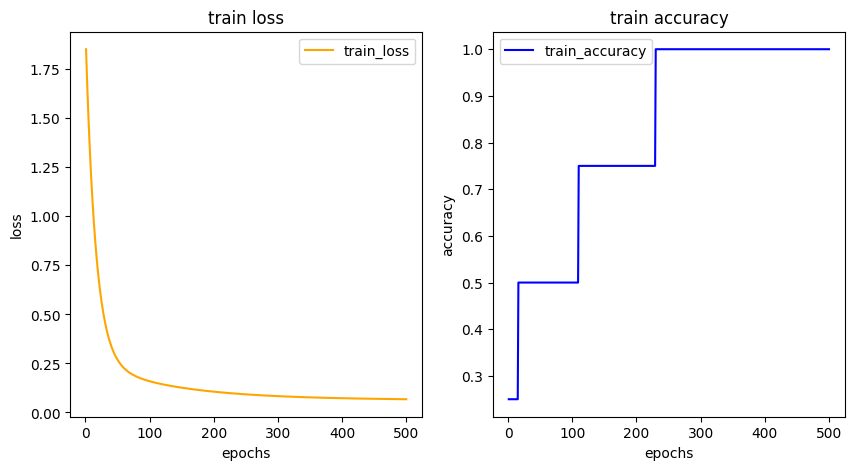

In [8]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

## XOR 게이트 구현하기

In [13]:
# 데이터 준비하기
data = np.array([[0,0], [0,1], [1,0], [1,1]]) # 학습데이터
label = np.array([[0], [1], [1], [0]]) # 정답

# 모델 구성하기
model = Sequential()
model.add(Dense(32, input_shape=(2, ), activation='relu')) # 다층 퍼셉트론으로 구성
model.add(Dense(1,activation='sigmoid'))

# 모델 설정하기
model.compile(optimizer=SGD(), loss=mse, metrics=['acc'])

# 모델 학습하기
history = model.fit(data, label, epochs=1000) # (학습데이터, 정답, 500번 공부)

Epoch 1/1000
1/1 [==============================] - 1s 882ms/step - loss: 0.2578 - acc: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2577 - acc: 0.2500
Epoch 3/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.2576 - acc: 0.2500
Epoch 4/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.2575 - acc: 0.2500
Epoch 5/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.2574 - acc: 0.2500
Epoch 6/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.2573 - acc: 0.2500
Epoch 7/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.2572 - acc: 0.2500
Epoch 8/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.2571 - acc: 0.2500
Epoch 9/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.2570 - acc: 0.2500
Epoch 10/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.2569 - acc: 0.2500
Epoch 11/1000
1/1 [==============================] - 0s 24

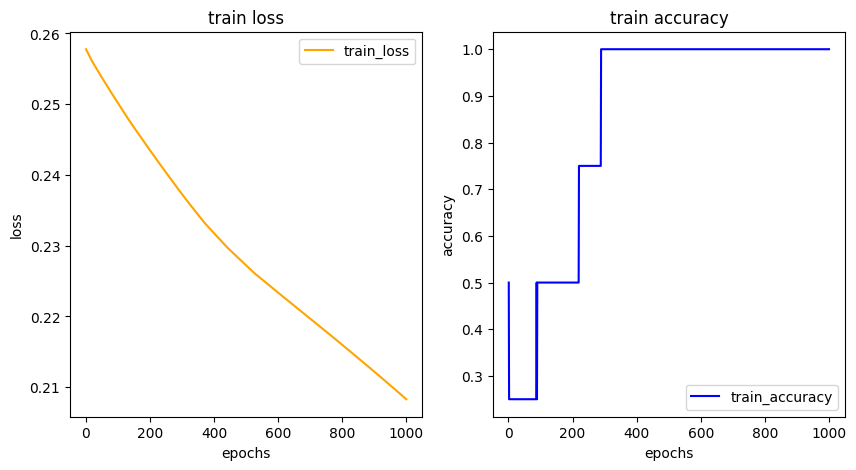

In [14]:
# 모델 결과 시각화
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()